In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
df= pd.read_csv('TAIPEI_diabetes.csv')

In [3]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB
None


In [4]:
print ( df.isnull().sum())

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64


In [5]:
print (df.describe())

          PatientID   Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
count  1.500000e+04  15000.000000   15000.000000            15000.000000   
mean   1.502922e+06      3.224533     107.856867               71.220667   
std    2.892534e+05      3.391020      31.981975               16.758716   
min    1.000038e+06      0.000000      44.000000               24.000000   
25%    1.252866e+06      0.000000      84.000000               58.000000   
50%    1.505508e+06      2.000000     104.000000               72.000000   
75%    1.755205e+06      6.000000     129.000000               85.000000   
max    1.999997e+06     14.000000     192.000000              117.000000   

       TricepsThickness  SerumInsulin           BMI  DiabetesPedigree  \
count      15000.000000  15000.000000  15000.000000      15000.000000   
mean          28.814000    137.852133     31.509646          0.398968   
std           14.555716    133.068252      9.759000          0.377944   
min            7.000000

In [6]:
df.duplicated().sum()

0

In [7]:
df_cleaned=df.copy()

In [8]:
print (df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB
None


In [9]:
print (df_cleaned.describe())

          PatientID   Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
count  1.500000e+04  15000.000000   15000.000000            15000.000000   
mean   1.502922e+06      3.224533     107.856867               71.220667   
std    2.892534e+05      3.391020      31.981975               16.758716   
min    1.000038e+06      0.000000      44.000000               24.000000   
25%    1.252866e+06      0.000000      84.000000               58.000000   
50%    1.505508e+06      2.000000     104.000000               72.000000   
75%    1.755205e+06      6.000000     129.000000               85.000000   
max    1.999997e+06     14.000000     192.000000              117.000000   

       TricepsThickness  SerumInsulin           BMI  DiabetesPedigree  \
count      15000.000000  15000.000000  15000.000000      15000.000000   
mean          28.814000    137.852133     31.509646          0.398968   
std           14.555716    133.068252      9.759000          0.377944   
min            7.000000

In [10]:
df_cleaned.columns

Index(['PatientID', 'Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age',
       'Diabetic'],
      dtype='object')

In [11]:
print(f"origin rows count: {df.shape[0]}")

def remove_outliers_iqr(df):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    numeric_cols = [col for col in numeric_cols if col not in ["Age", "PatientID", "Pregnancies", "Diabetic"]]
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1 * IQR
        upper_bound = Q3 + 1 * IQR
        
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        
        print(f"{col}: there are {df.shape[0]} rows after removing outliers.")
    
    return df

df_cleaned = df.copy()

df_cleaned = remove_outliers_iqr(df_cleaned)

print(f"Final rows count: {df_cleaned.shape[0]}")

origin rows count: 15000
PlasmaGlucose: there are 14683 rows after removing outliers.
DiastolicBloodPressure: there are 14539 rows after removing outliers.
TricepsThickness: there are 14473 rows after removing outliers.
SerumInsulin: there are 13453 rows after removing outliers.
BMI: there are 13453 rows after removing outliers.
DiabetesPedigree: there are 12680 rows after removing outliers.
Final rows count: 12680


In [12]:
# Remove abnormal pregnancies values
print(f"Rows count before cleaning: {df_cleaned.shape[0]}")
df_cleaned = df_cleaned[df_cleaned['Pregnancies'] <= (df_cleaned['Age'] - 18)]
print(f"Rows count after cleaning: {df_cleaned.shape[0]}")

Rows count before cleaning: 12680
Rows count after cleaning: 10471


In [13]:
df_cleaned.to_csv('clean_TAIPEI_diabetes.csv', index=False, columns=list(df_cleaned.columns))

In [14]:
X = df.drop(columns=["Diabetic"])  # All columns except the target
y = df["Diabetic"]                 # Target column

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

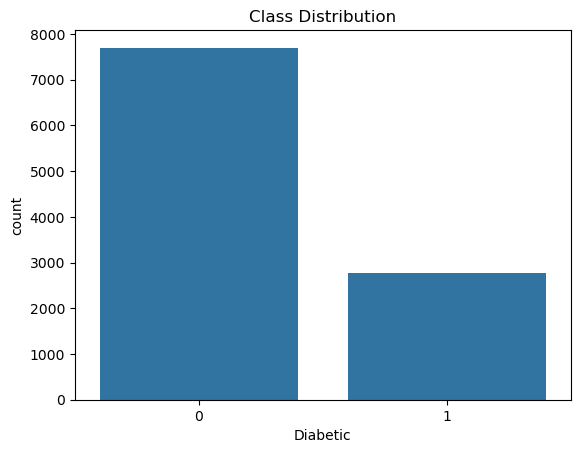

In [17]:
# Class balance
sns.countplot(x='Diabetic', data=df_cleaned)
plt.title("Class Distribution")
plt.show()

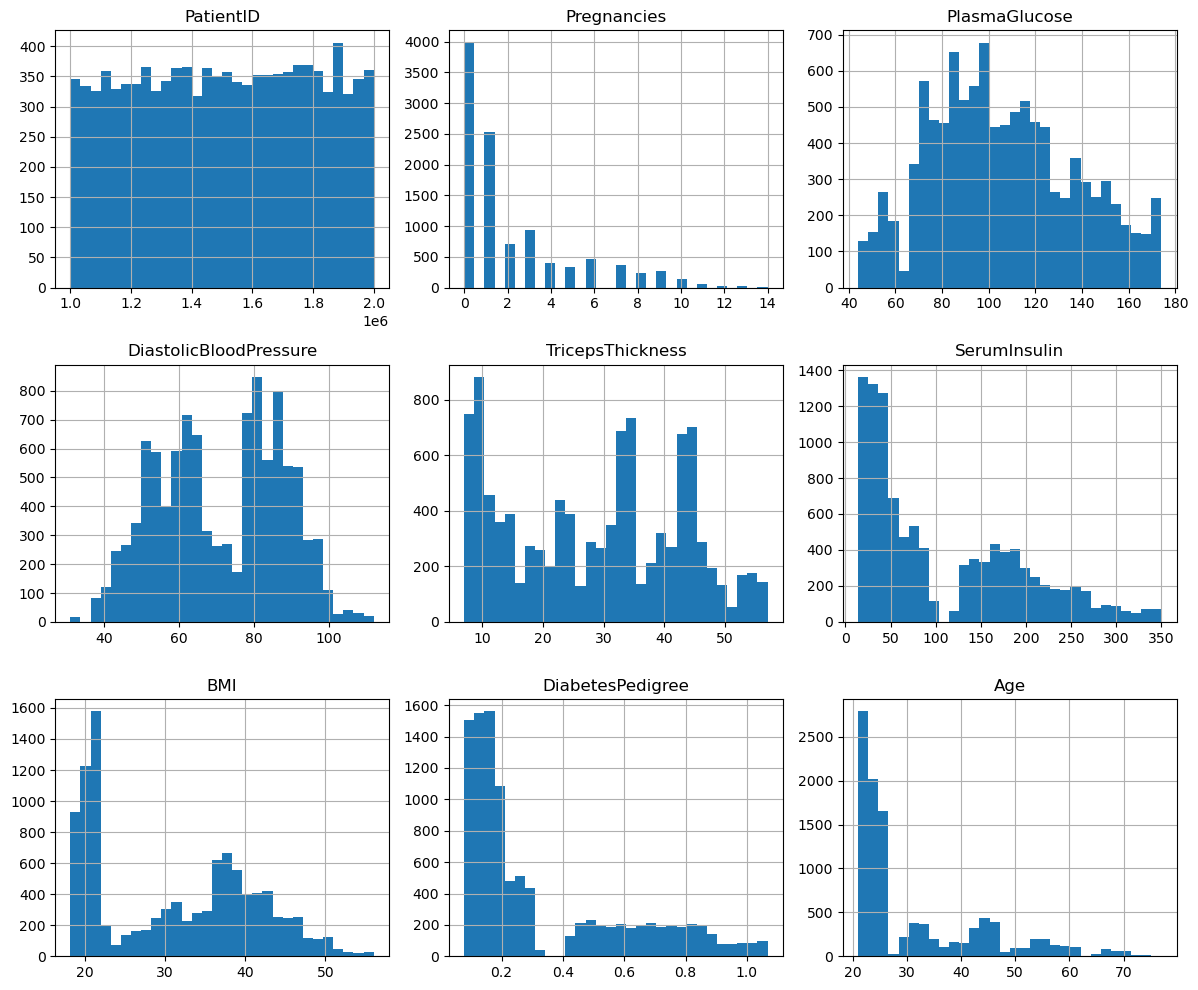

In [18]:
# Feature distribution
df_cleaned.drop(columns=['Diabetic']).hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

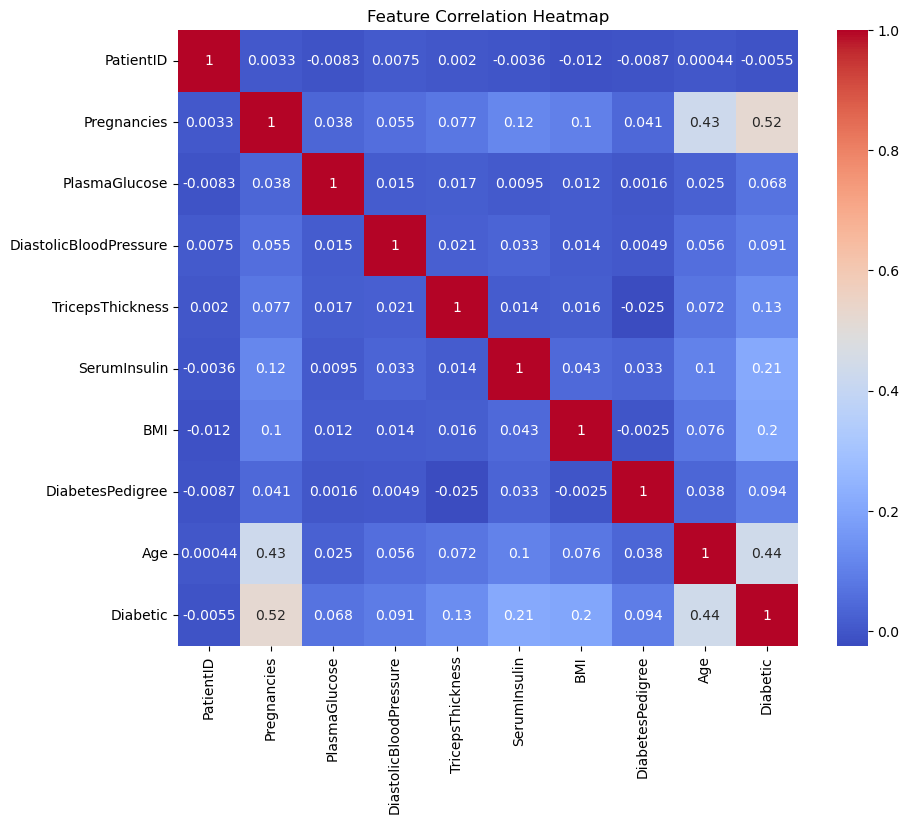

In [19]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

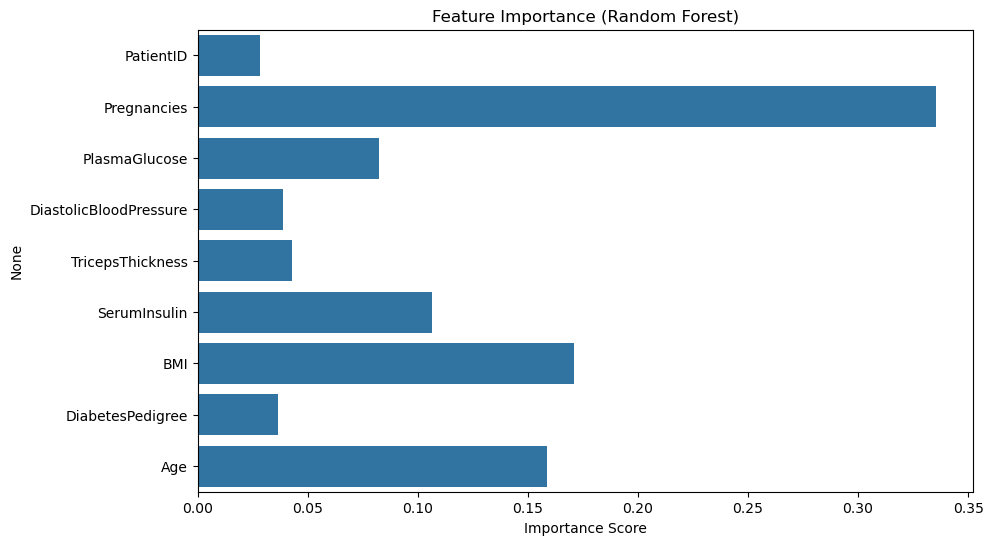

In [20]:
# Feature importance from Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_scaled, y)

importances = rfc.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.show()

In [21]:
import pandas as pd
import numpy as np


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import (
    accuracy_score, confusion_matrix,
    classification_report, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt


In [23]:
df = pd.read_csv("clean_TAIPEI_diabetes.csv")


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [25]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [26]:
y_pred = rfc.predict(X_test)            # Binary predictions
y_proba = rfc.predict_proba(X_test)[:, 1]  # Probability of being diabetic (for ROC AUC)


In [27]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy * 100, 2), "%")


Accuracy: 93.6 %


In [28]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[1917   83]
 [ 109  891]]


In [29]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      2000
           1       0.91      0.89      0.90      1000

    accuracy                           0.94      3000
   macro avg       0.93      0.92      0.93      3000
weighted avg       0.94      0.94      0.94      3000



In [30]:
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", round(roc_auc, 4))


ROC AUC Score: 0.9795


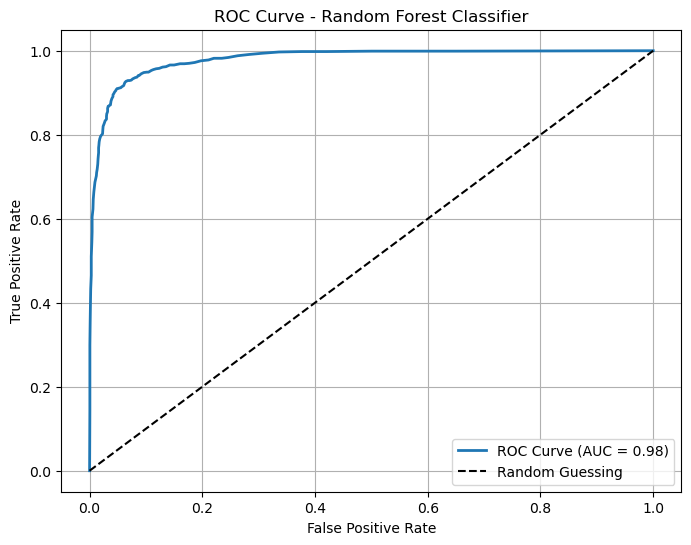

In [31]:
 ## the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest Classifier")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [32]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("F1 Score:", roc_auc_score(y_test, y_proba))


Accuracy: 0.936
Confusion Matrix:
 [[1917   83]
 [ 109  891]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      2000
           1       0.91      0.89      0.90      1000

    accuracy                           0.94      3000
   macro avg       0.93      0.92      0.93      3000
weighted avg       0.94      0.94      0.94      3000

ROC AUC Score: 0.9795134999999999
F1 Score: 0.9795134999999999
